## Python Finanças fundamentais

In [50]:
import pandas as pd

In [51]:
!pip install quandl


In [52]:
import quandl

## Criar Portifolio

In [53]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [54]:
# Grabbing a bunch of tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',
                  start_date = start,
                  end_date = end)
cisco = quandl.get('WIKI/CSCO.11',
                   start_date = start,
                   end_date = end)
ibm = quandl.get('WIKI/IBM.11',
                 start_date = start,
                 end_date = end)
amzn = quandl.get('WIKI/AMZN.11',
                  start_date = start,
                  end_date = end)

In [ ]:
# Alternative

aapl = pd.read_csv('AAPL_CLOSE',
                   index_col = 'Date',
                   parse_dates = True)
cisco = pd.read_csv('CISCO_CLOSE',
                    index_col = 'Date',
                    parse_dates = True)
ibm = pd.read_csv('IBM_CLOSE',
                  index_col = 'Date',
                  parse_dates = True)
amzn = pd.read_csv('AMZN_CLOSE',
                   index_col = 'Date',
                   parse_dates = True)

In [55]:
'''
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')
'''

"\naapl.to_csv('AAPL_CLOSE')\ncisco.to_csv('CISCO_CLOSE')\nibm.to_csv('IBM_CLOSE')\namzn.to_csv('AMZN_CLOSE')\n"

## Normalização de Preços

In [56]:
# Example
aapl.iloc[0]['Adj. Close']

52.848786580038

In [57]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [58]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [59]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


Allocations
Let's pretend we had the following allocations for our total portfolio:

30% in Apple
20% in Google/Alphabet
40% in Amazon
10% in IBM

In [61]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [62]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [63]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [64]:
portfolio_val = pd.concat([aapl['Position Values'],
                           cisco['Position Values'],
                           ibm['Position Values'],
                           amzn['Position Values']],
                          axis = 1)

In [65]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [66]:
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [67]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [68]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis = 1)

In [69]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

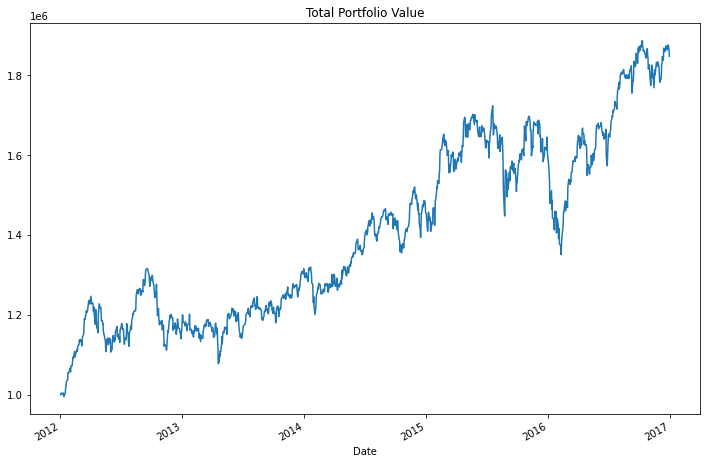

In [71]:
portfolio_val['Total Pos'].plot(figsize = (12, 8))
plt.title('Total Portfolio Value')

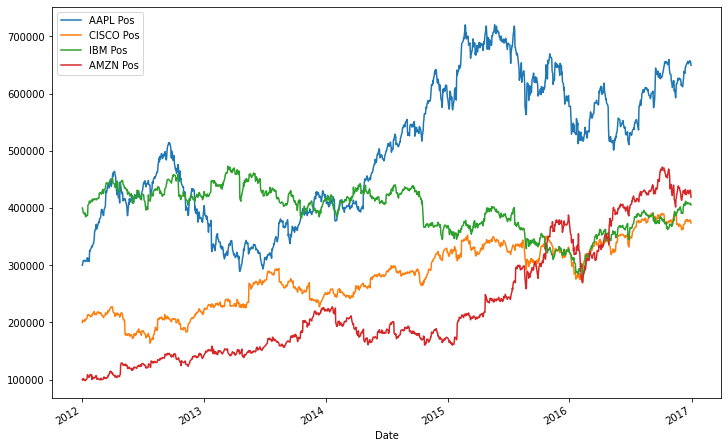

In [72]:
portfolio_val.drop('Total Pos',
                   axis = 1).plot(kind = 'line', figsize = (12, 8))

In [73]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541,1.865523e+06
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119,1.847429e+06


Portfolio Statistics

Retornos Diários

In [74]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

Retornos acumulados

In [75]:
cum_ret = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 84.74285181665545 was percent!


Retornos average diarias

In [76]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

STD diarias retornos

In [77]:
portfolio_val['Daily Return'].std()

0.010568287769161718

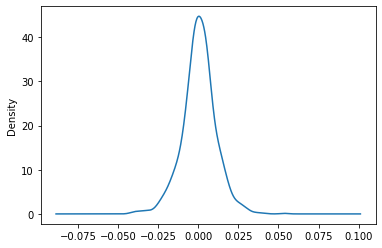

In [78]:
portfolio_val['Daily Return'].plot(kind = 'kde')

Sharpe Ratio
The Sharpe Ratio is a measure for calculating risk-adjusted return, and this ratio has become the industry standard for such calculations.

Sharpe ratio = (Mean portfolio return − Risk-free rate) / Standard deviation of portfolio return

The original Sharpe Ratio

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

Daily = sqrt(252)
Weekly = sqrt(52)
Monthly = sqrt(12)
Since I'm based in the USA, I will use a very low risk-free rate (the rate you would get if you just put your money in a bank, its currently very low in the USA, let's just say its ~0% return). If you are in a different country with higher rates for your trading currency, you can use this trick to convert a yearly rate with a daily rate:

daily_rate = ((1.0 + yearly_rate) ** (1/252))-1

Other values people use are things like the 3-month treasury bill or LIBOR.

Read more: Sharpe Ratio http://www.investopedia.com/terms/s/sharperatio

In [79]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [80]:
SR

0.05149680662648092

In [81]:
ASR = (252 ** 0.5) * SR

In [82]:
ASR

0.8174864618859096

In [83]:
portfolio_val['Daily Return'].std()

0.010568287769161718

In [84]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

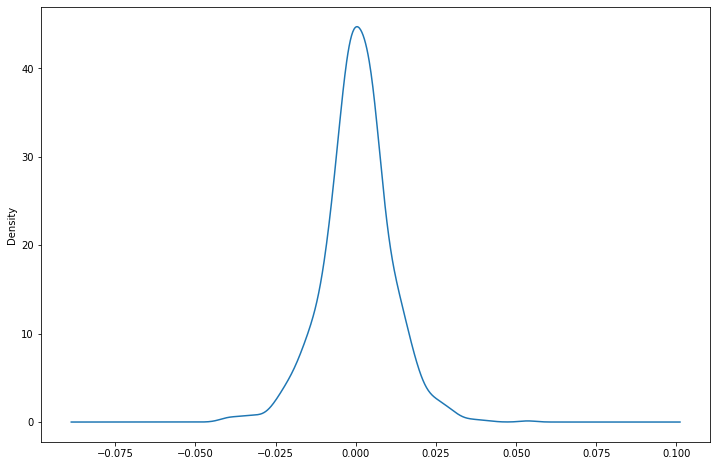

In [86]:
fig = plt.figure(figsize = (12, 8))
portfolio_val['Daily Return'].plot(kind = 'kde')

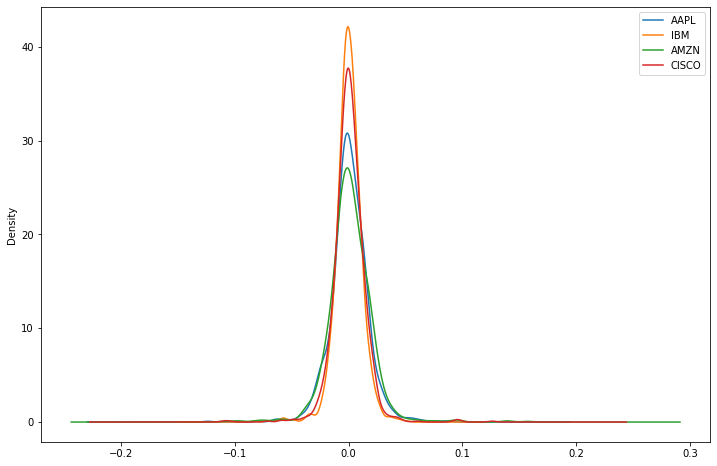

In [87]:
fig = plt.figure(figsize = (12, 8))
aapl['Adj. Close'].pct_change(1).plot(kind = 'kde', label = 'AAPL')
ibm['Adj. Close'].pct_change(1).plot(kind = 'kde', label = 'IBM')
amzn['Adj. Close'].pct_change(1).plot(kind = 'kde', label = 'AMZN')
cisco['Adj. Close'].pct_change(1).plot(kind = 'kde', label = 'CISCO')
plt.legend()

In [88]:
import numpy as np
np.sqrt(252) * (np.mean(.001 - 0.0002) / .001)

12.699606293110037